##Load Data

In [32]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [33]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/ML"

In [34]:
%cd /content/gdrive/My Drive/ML

/content/gdrive/My Drive/ML


In [35]:
!kaggle datasets download -d alessiocorrado99/animals10

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /content/gdrive/My Drive/ML. Or use the environment method.


In [36]:
!ls

animals10.zip


In [37]:
import pandas as pd
import numpy as np
import os
import zipfile
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import shutil
import tensorflow as tf
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm.notebook import tqdm as tq
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam

In [38]:
# Ekstrak dataset

local_zip = '/content/gdrive/My Drive/ML/animals10.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/gdrive/My Drive/ML')
zip_ref.close()

In [42]:
import os
from PIL import Image
base_dataset = "/content/gdrive/My Drive/ML/raw-img"
class_dir = ['scoiattolo','ragno','pecora','mucca','gatto','gallina','farfalla','elefante','cavallo','cane']
for class_item in class_dir:
  cur_dir = base_dataset + '/' + class_item + '/'
  dataset = os.listdir(cur_dir)
  for item in dataset :
    im = Image.open(f"{cur_dir}{item}")
    if item.endswith('.jpg'):
      if im.mode == "CMYK":
        im.convert('RGB')
      else :
        im.save(f"{cur_dir}{item.split('.')[0]}.png", "png")
    else :
      im.save(f"{cur_dir}{item.split('.')[0]}.png", "png")
  for item in dataset :
    if not item.endswith('.png'):
      os.remove(os.path.join(cur_dir, item))

In [43]:
file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(base_dataset):
    for name in files:
        full_path.append(os.path.join(path, name)) 
        tag.append(path.split('/')[-1])        
        file_name.append(name)

In [44]:
# membuat dataframe dari variabel baru
data = pd.DataFrame({'path':full_path,'file_name':file_name,'tag':tag})
data.groupby(['tag']).size()

tag
cane          4863
cavallo       2623
elefante      1445
farfalla      2112
gallina       3098
gatto         1668
mucca         1866
pecora        1820
ragno         4821
scoiattolo    1862
dtype: int64

In [45]:
x = data['path']
y = data['tag']

In [46]:
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.30)

In [47]:
# menyatukan ke dalam masing-masing dataframe
data_tr = pd.DataFrame({'path':X_train, 'tag':y_train, 'set':'training'})

data_val = pd.DataFrame({'path':X_val, 'tag':y_val, 'set':'validation'})

In [48]:
print('train size', len(data_tr))
print('val size', len(data_val))

train size 18324
val size 7854


In [49]:
#1.3 cek penamaan image 
dataset_path = '/content/gdrive/My Drive/ML/model-raw-img'

data_all = data_tr.append([data_tr, data_val]).reset_index(drop=1)

for index, row in tq(data_all.iterrows()):
    
    #detect filepath
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(base_dataset,row['tag'],row['image'].split('.')[0])            
    
    #make folder destination dirs
    if os.path.exists(os.path.join(dataset_path,row['set'],row['tag'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['tag']))
    
    #define file dest
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['tag'],destination_file_name)
    
    #copy file from source to dest
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

0it [00:00, ?it/s]

In [50]:
scoiattolo_train = "/content/gdrive/My Drive/ML/model-raw-img/training/scoiattolo"
scoiattolo_validation = "/content/gdrive/My Drive/ML/model-raw-img/validation/scoiattolo"
ragno_train = "/content/gdrive/My Drive/ML/model-raw-img/training/ragno"
ragno_validation = "/content/gdrive/My Drive/ML/model-raw-img/validation/ragno"
pecora_train = "/content/gdrive/My Drive/ML/model-raw-img/training/pecora"
pecora_validation = "/content/gdrive/My Drive/ML/model-raw-img/validation/pecora"
mucca_train = "/content/gdrive/My Drive/ML/model-raw-img/training/mucca"
mucca_validation = "/content/gdrive/My Drive/ML/model-raw-img/validation/mucca"
gatto_train = "/content/gdrive/My Drive/ML/model-raw-img/training/gatto"
gatto_validation = "/content/gdrive/My Drive/ML/model-raw-img/validation/gatto"
gallina_train = "/content/gdrive/My Drive/ML/model-raw-img/training/gallina"
gallina_validation = "/content/gdrive/My Drive/ML/model-raw-img/validation/gallina"
farfalla_train = "/content/gdrive/My Drive/ML/model-raw-img/training/farfalla"
farfalla_validation = "/content/gdrive/My Drive/ML/model-raw-img/validation/farfalla"
elefante_train = "/content/gdrive/My Drive/ML/model-raw-img/training/elefante"
elefante_validation = "/content/gdrive/My Drive/ML/model-raw-img/validation/elefante"
cavallo_train = "/content/gdrive/My Drive/ML/model-raw-img/training/cavallo"
cavallo_validation = "/content/gdrive/My Drive/ML/model-raw-img/validation/cavallo"
cane_train = "/content/gdrive/My Drive/ML/model-raw-img/training/cane"
cane_validation = "/content/gdrive/My Drive/ML/model-raw-img/validation/cane"

file_train_sco = os.listdir(scoiattolo_train)
file_Val_sco = os.listdir(scoiattolo_validation)
file_train_rag = os.listdir(ragno_train)
file_Val_rag = os.listdir(ragno_validation)
file_train_pec = os.listdir(pecora_train)
file_Val_pec = os.listdir(pecora_validation)
file_train_muc = os.listdir(mucca_train)
file_Val_muc = os.listdir(mucca_validation)
file_train_gat = os.listdir(gatto_train)
file_Val_gat = os.listdir(gatto_validation)
file_train_gal = os.listdir(gallina_train)
file_Val_gal = os.listdir(gallina_validation)
file_train_far = os.listdir(farfalla_train)
file_Val_far = os.listdir(farfalla_validation)
file_train_ele = os.listdir(elefante_train)
file_Val_ele = os.listdir(elefante_validation)
file_train_cav = os.listdir(cavallo_train)
file_Val_cav = os.listdir(cavallo_validation)
file_train_can = os.listdir(cane_train)
file_Val_can = os.listdir(cane_validation)

print("data scoiattolo train : " + str(len(file_train_sco)))
print("data scoiattolo validation : " + str(len(file_Val_sco)))
print("data ragno train : " + str(len(file_train_rag)))
print("data ragno validation : " + str(len(file_Val_rag)))
print("data pecora train : " + str(len(file_train_pec)))
print("data pecora validation : " + str(len(file_Val_pec)))
print("data mucca train : " + str(len(file_train_muc)))
print("data mucca validation : " + str(len(file_Val_muc)))
print("data gatto train : " + str(len(file_train_gat)))
print("data gatto validation : " + str(len(file_Val_gat)))
print("data gallina train : " + str(len(file_train_gal)))
print("data gallina validation : " + str(len(file_Val_gal)))
print("data farfalla train : " + str(len(file_train_far)))
print("data farfalla validation : " + str(len(file_Val_far)))
print("data elefante train : " + str(len(file_train_ele)))
print("data elefante validation : " + str(len(file_Val_ele)))
print("data cavallo train : " + str(len(file_train_cav)))
print("data cavallo validation : " + str(len(file_Val_cav)))
print("data cane train : " + str(len(file_train_can)))
print("data cane validation : " + str(len(file_Val_can)))

data scoiattolo train : 1282
data scoiattolo validation : 580
data ragno train : 3354
data ragno validation : 1467
data pecora train : 1283
data pecora validation : 537
data mucca train : 1313
data mucca validation : 553
data gatto train : 1193
data gatto validation : 475
data gallina train : 2159
data gallina validation : 939
data farfalla train : 1480
data farfalla validation : 632
data elefante train : 1022
data elefante validation : 423
data cavallo train : 1847
data cavallo validation : 776
data cane train : 3391
data cane validation : 1472


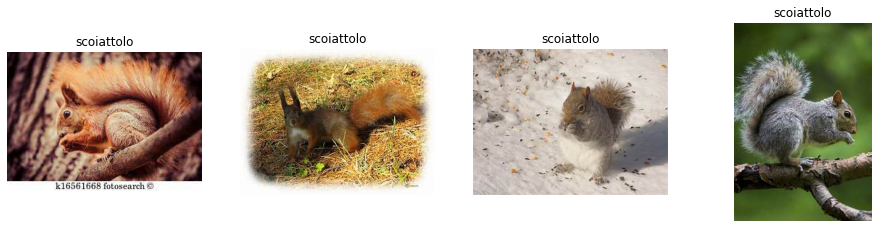

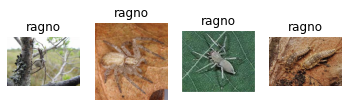

In [51]:
nrows = 2
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

next_sco_pix = [os.path.join(scoiattolo_train, fname)
                 for fname in os.listdir(scoiattolo_train)[:4]]
next_rag_pix = [os.path.join(ragno_train, fname)
                 for fname in os.listdir(ragno_train)[:4]]    

for i, img_path in enumerate(next_sco_pix):
  sp = plt.subplot(2,4, i+1)
  sp.axis('off')
  img = mpimg.imread(img_path)
  plt.title('scoiattolo')
  plt.imshow(img)
plt.show()

for i, img_path in enumerate(next_rag_pix):
  sp = plt.subplot(2,4, i+1)
  sp.axis('off')
  img = mpimg.imread(img_path)
  plt.title('ragno')
  plt.imshow(img)
plt.show()

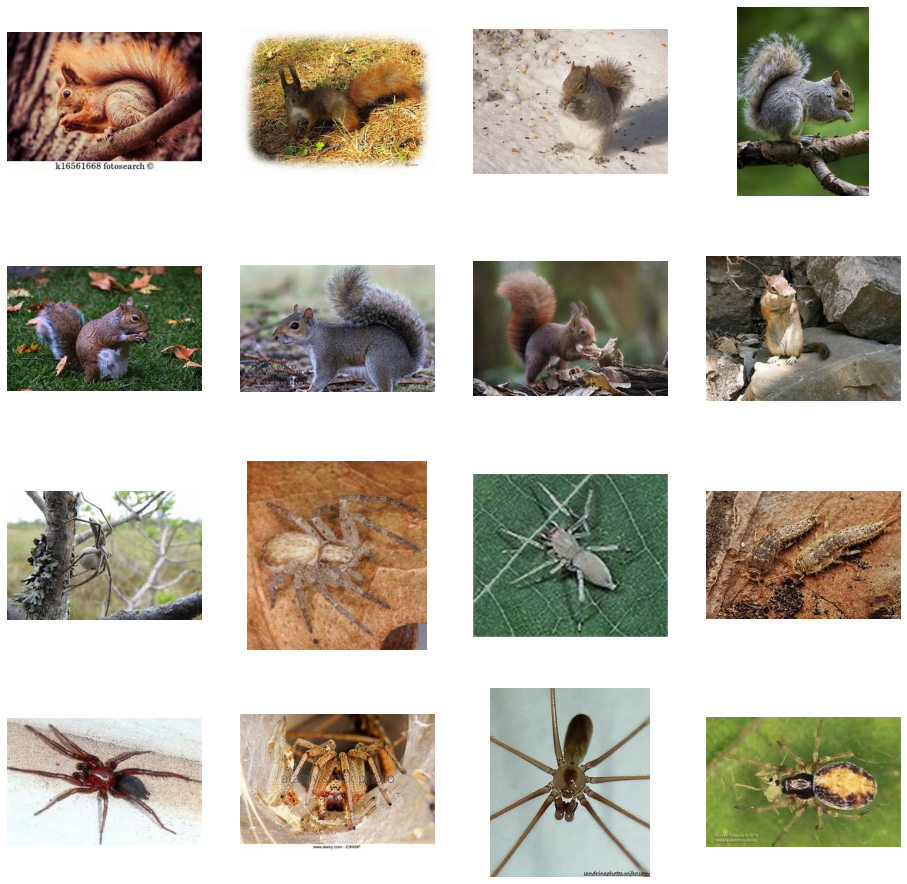

In [52]:
# Tampilkan 8 image per kelas dengan ukuran 4x4 

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_sco_pix = [os.path.join(scoiattolo_train, fname) 
                for fname in os.listdir(scoiattolo_train)[pic_index-8:pic_index]]
next_rag_pix = [os.path.join(ragno_train, fname) 
                for fname in os.listdir(ragno_train)[pic_index-8:pic_index]]

for i, img_path in enumerate(next_sco_pix+next_rag_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


##Preprocesing

In [53]:
import os
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []

train_dir='/content/gdrive/My Drive/ML/model-raw-img/training'
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (100,100))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [54]:
# Gather data validation
val_data = []
val_label = []

vali_dir='/content/gdrive/My Drive/ML/model-raw-img/training'
for r, d, f in os.walk(vali_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (100,100))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [55]:
# Tampilan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (18324, 100, 100, 3)
Train Label =  (18324,)
Validation Data =  (18324, 100, 100, 3)
Validation Label =  (18324,)


In [56]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [136 231 200]
Data setelah di-normalisasi  [0.53333336 0.90588236 0.78431374]


In [58]:
from sklearn.preprocessing import LabelEncoder
print("Label sebelum di-encoder ", train_label[995:1005])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[995:1005])

Label sebelum di-encoder  ['gallina' 'gallina' 'gallina' 'gallina' 'gallina' 'gallina' 'gallina'
 'gallina' 'gallina' 'gallina']
Label setelah di-encoder  [4 4 4 4 4 4 4 4 4 4]


##Modelling

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, GlobalMaxPooling2D, AveragePooling2D, GlobalMaxPooling2D

In [60]:
# Model Scenario Pertama
# Feature Extraction Layer
model = Sequential()

model.add(InputLayer(input_shape=[250,250,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(GlobalMaxPooling2D())
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 250, 250, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 125, 125, 16)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 63, 63, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
global_max_pooling2d_3 (Glob (None, 64)               

In [63]:
# Model Scenario Kedua
model2 = Sequential()

model2.add(InputLayer(input_shape=[250,250,3]))
model2.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(AveragePooling2D(pool_size=2, padding='same'))
model2.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(AveragePooling2D(pool_size=2, padding='same'))
model2.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(AveragePooling2D(pool_size=2, padding='same'))
model2.add(GlobalMaxPooling2D())
model2.add(Flatten())

# Fully Connected Layer
model2.add(Dense(512, activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(10, activation='softmax'))

print(model2.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 250, 250, 16)      448       
_________________________________________________________________
average_pooling2d_6 (Average (None, 125, 125, 16)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 125, 125, 32)      4640      
_________________________________________________________________
average_pooling2d_7 (Average (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 63, 63, 64)        18496     
_________________________________________________________________
average_pooling2d_8 (Average (None, 32, 32, 64)        0         
_________________________________________________________________
global_max_pooling2d_5 (Glob (None, 64)               

In [62]:
# Training model scenario Pertama
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=Adam(lr=0.001),
              loss='sparse_categorical_crossentropy', 
              metrics=['acc'])

H = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_val, y_val))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
573/573 [==============================] - 236s 409ms/step - loss: 1.9196 - acc: 0.3213 - val_loss: 1.7207 - val_acc: 0.3985
Epoch 2/50
573/573 [==============================] - 234s 409ms/step - loss: 1.4876 - acc: 0.4777 - val_loss: 1.3870 - val_acc: 0.5159
Epoch 3/50
573/573 [==============================] - 246s 429ms/step - loss: 1.3096 - acc: 0.5446 - val_loss: 1.2084 - val_acc: 0.5790
Epoch 4/50
573/573 [==============================] - 235s 411ms/step - loss: 1.2059 - acc: 0.5785 - val_loss: 1.0888 - val_acc: 0.6207
Epoch 5/50
573/573 [==============================] - 238s 416ms/step - loss: 1.1309 - acc: 0.6037 - val_loss: 1.0663 - val_acc: 0.6315
Epoch 6/50
573/573 [==============================] - 241s 422ms/step - loss: 1.0540 - acc: 0.6315 - val_loss: 0.9873 - val_acc: 0.6537
Epoch 7/50
573/573 [==============================] - 241s 422ms/step - loss: 0.9955 - acc: 0.6499 - val_loss: 0.9180 - val_acc: 0.6786
Epoch 8/50
573/573 [============================

In [64]:
# Training model scenario kedua
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
model2.compile(optimizer=Adam(lr=0.001),
              loss='sparse_categorical_crossentropy', 
              metrics=['acc'])

H2 = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_val, y_val))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
573/573 [==============================] - 226s 394ms/step - loss: 0.1147 - acc: 0.9606 - val_loss: 0.1540 - val_acc: 0.9461
Epoch 2/50
573/573 [==============================] - 226s 394ms/step - loss: 0.1232 - acc: 0.9566 - val_loss: 0.1239 - val_acc: 0.9557
Epoch 3/50
573/573 [==============================] - 228s 398ms/step - loss: 0.1439 - acc: 0.9512 - val_loss: 0.0620 - val_acc: 0.9810
Epoch 4/50
573/573 [==============================] - 224s 391ms/step - loss: 0.0763 - acc: 0.9743 - val_loss: 0.2240 - val_acc: 0.9349
Epoch 5/50
573/573 [==============================] - 224s 391ms/step - loss: 0.1581 - acc: 0.9468 - val_loss: 0.1273 - val_acc: 0.9544
Epoch 6/50
573/573 [==============================] - 222s 388ms/step - loss: 0.0997 - acc: 0.9671 - val_loss: 0.0820 - val_acc: 0.9735
Epoch 7/50
573/573 [==============================] - 222s 388ms/step - loss: 0.1044 - acc: 0.9650 - val_loss: 0.0996 - val_acc: 0.9642
Epoch 8/50
573/573 [============================

In [69]:
import pickle
model.save('model.h5')

In [70]:
model2.save('model.h5')